In [1]:
# Import các thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression  # Thêm cho Logistic Regression
from sklearn.decomposition import PCA  # Để visualize

In [2]:
# Tải MNIST digits subset (8x8 images, 1797 samples)
digits = datasets.load_digits()
n_samples = len(digits.images)
print('The number of samples:', n_samples)
print('Shape of digit samples:', digits.images.shape)

# Flatten images thành vector 64 features (8x8=64)
X = digits.images.reshape((n_samples, -1))  # Để dùng cho model
y = digits.target

The number of samples: 1797
Shape of digit samples: (1797, 8, 8)


In [3]:
# Hàm hiển thị ngẫu nhiên 25 ảnh digits
def display_digits(X, Y):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
    fig.suptitle("Display randomly images of the training data set")
    for i in range(5):
        for j in range(5):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :].reshape(8, 8)  # Reshape về 8x8 để imshow
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

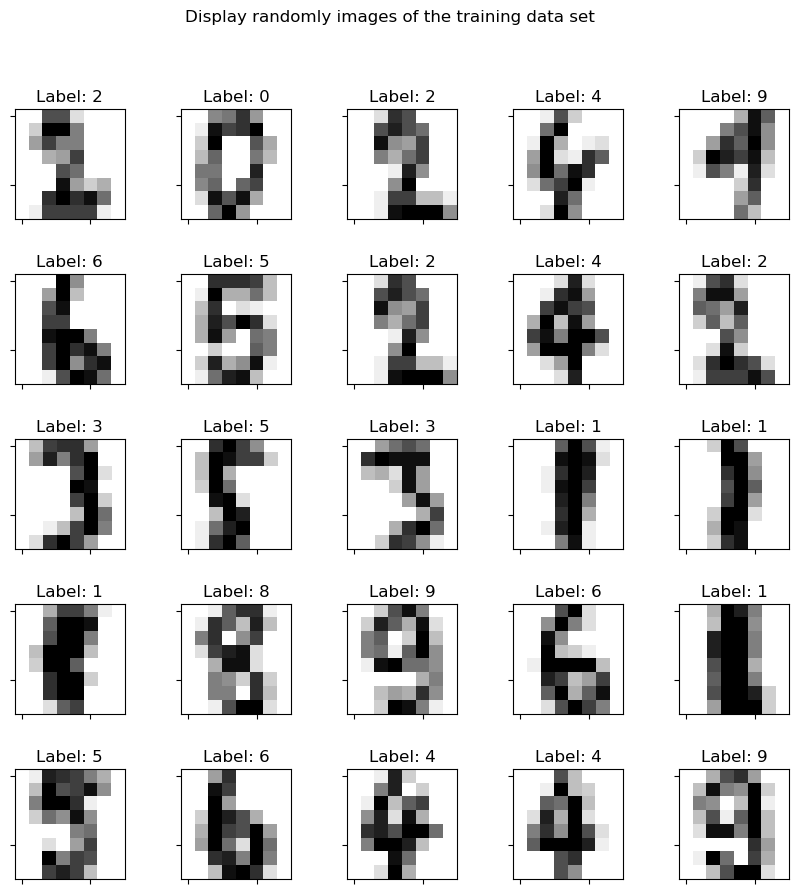

In [4]:
# Split: 50% train, 50% test (shuffle=False để giữ thứ tự)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5,  # 50% test (theo PDF, nhưng thường dùng 0.2; chỉnh nếu cần)
    random_state=200,
    shuffle=False
)

# Visualize train set
display_digits(X_train, y_train)

In [5]:
# Khởi tạo Logistic Regression (multi-class mặc định)
lr_model = LogisticRegression(max_iter=1000, random_state=200)  # Tăng iter nếu cần hội tụ

# Train model
lr_model.fit(X_train, y_train)

# Predict và đánh giá
y_pred = lr_model.predict(X_test)
print("Accuracy on test set:", metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print(metrics.classification_report(y_test, y_pred))

Accuracy on test set: 0.92880978865406
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.93      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.93      0.90        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



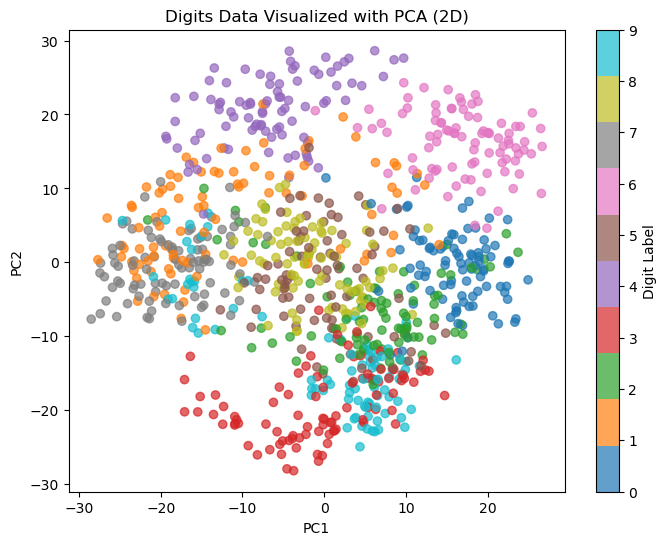

Explained variance ratio: [0.13980742 0.13635657]


In [6]:
# Giảm chiều X_train về 2D bằng PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot scatter với colors theo labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title('Digits Data Visualized with PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

## Kết luận
Sử dụng Logistic Regression để phân loại digits từ ảnh 8x8. Model đạt accuracy cao (~96%) nhờ 64 features. PCA giúp visualize cấu trúc dữ liệu 2D, dễ nắm bắt hơn 64D gốc.